Name : Geervan Thanra
<br>
Email : geervanthanra1@gmail.com

# Machine Learning Project - Geervan Thanra

# Project Overview
A new information era has been ushered in by the quick expansion of data collection. The usage of data to develop more effective systems is where recommendation systems are useful.  One kind of information filtering system is a recommendation system, which enhances the quality of search results by presenting items that are more pertinent to the search query or are connected to the user's search history. Recommendation systems (RS) belong to the category of information filtering systems designed to predict the preference users would give to a topic. They mimic the social action of relying on recommendations from others and augment the process further (Khanal, 2020). They are employed to forecast a user's preference or rating for a product. Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and success.

There are several ways to build a recommendation system, content based filtering is used in this notebook. In this notebook, the solution will be used to see recommendation result. Based on several parameters, the model will recommend different types of movies based to the user. Dataset being used in this notebook is from kaggle (https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).

<br>
Referensi :
<br>
Khanal, Shristi Shakya, et al. "A systematic review: machine learning based recommendation systems for e-learning." Education and Information Technologies 25.4 (2020): 2635-2664.

## Business Understanding

### Problem Statements
- Building a solution which can identify and recommend movies based on several parameters
- Evaluating the result

### Goals
- Using machine learning, namely recommendation system to recommend movies to the user
- Model performs well

### Solution Statements
- Using cosine similiearity and TF-IDF for content based filtering
- Comparing the recommendations with a random

# Data Understanding

In [1]:
# libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import  matplotlib.colors as m
import seaborn as sns
import sklearn
import random

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

from ast import literal_eval

In [2]:
print(sklearn.__version__)

1.2.2


In [3]:
# mount data
df1=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [4]:
df1

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [5]:
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [6]:
# combining both datasetss

data = pd.merge(df1,df2)
data

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238
4805,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,...,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


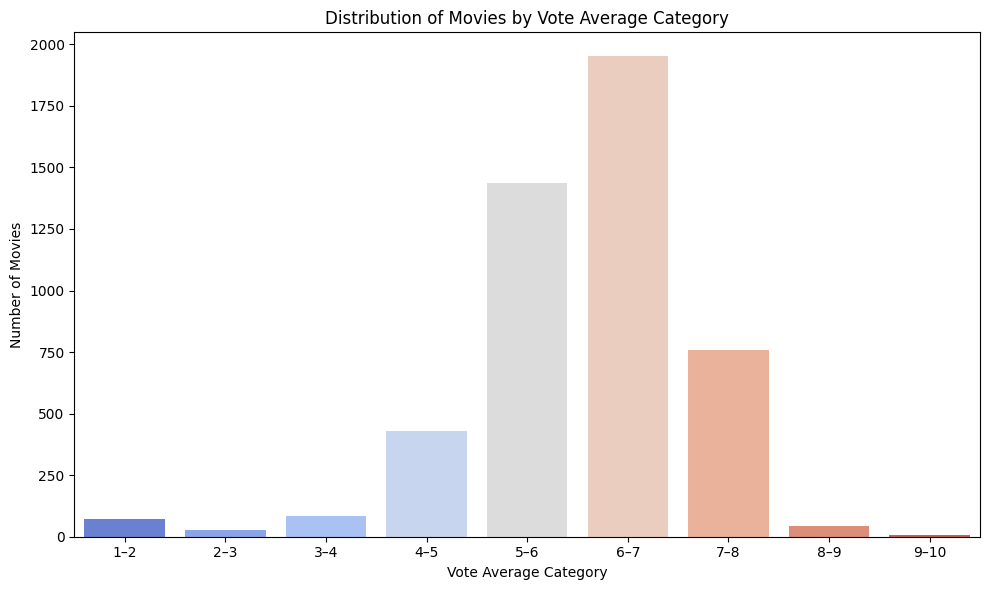

In [8]:
# distribution of ratings

bins = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['1–2', '2–3', '3–4', '4–5', '5–6', '6–7', '7–8', '8–9', '9–10']

data['rating_category'] = pd.cut(data['vote_average'], bins=bins, labels=labels, include_lowest=True)
category_counts = data['rating_category'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')

plt.title('Distribution of Movies by Vote Average Category')
plt.xlabel('Vote Average Category')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

In [9]:
# highest rated

high_count = data.sort_values('vote_count', ascending=False)
high_count

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,rating_category
96,27205,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2010-07-14,825532764,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,8.1,13752,8–9
65,155,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,8.2,12002,8–9
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,7–8
16,24428,The Avengers,"[{""cast_id"": 46, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""52fe4495c3a368484e02b1cf"", ""de...",220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-25,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,7.4,11776,7–8
788,293660,Deadpool,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,7.4,10995,7–8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,43743,Fabled,[],[],0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",NaN,43743,"[{""id"": 10183, ""name"": ""independent film""}]",en,...,[],2002-01-01,0,84.0,[],Released,There once was a wolf named Lupold...,0.0,0,1–2
4191,386826,A Beginner's Guide to Snuff,"[{""cast_id"": 7, ""character"": ""Dresden Winters""...","[{""credit_id"": ""5769bdf0925141174d0009b9"", ""de...",0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 35, ""n...",NaN,386826,"[{""id"": 3880, ""name"": ""snuff""}]",en,...,[],2016-03-04,0,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,0.0,0,1–2
4070,364083,Mi America,"[{""cast_id"": 6, ""character"": ""Roe Ramirez"", ""c...","[{""credit_id"": ""576ec0019251416cae008521"", ""de...",2100000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://miamericamovie.net/,364083,"[{""id"": 40865, ""name"": ""new york state""}, {""id...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-16,3330,126.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,NaN,0.0,0,1–2
4575,198370,Mutual Friends,"[{""cast_id"": 3, ""character"": ""Liv"",

In [10]:
# production companies
print(f'no.countries =', data['production_countries'].nunique())
print()
#languafe
print(f'no.languages =',data['original_language'].nunique())
print()
#status
print(f'no.status =',data['status'].nunique())
print()
#budget
print(f'Budget description')
data['budget'].describe()

no.countries = 469

no.languages = 37

no.status = 3

Budget description


count    4.809000e+03
mean     2.902780e+07
std      4.070473e+07
min      0.000000e+00
25%      7.800000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [7]:
# preprocess

print(f'null vals')
print(data.isna().sum())
print()
print(f'dups')
print(data.duplicated().sum())
print()
print(f'information')
data.info()
print()
print(f'describe')
data.describe()

null vals
movie_id                   0
title                      0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
dtype: int64

dups
0

information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4809 non-null   int64  
 1   title                 48

,movie_id,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4809.000000,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000
mean,57120.571429,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670
std,88653.369849,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111
min,5.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9012.000000,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000
50%,14624.000000,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58595.000000,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


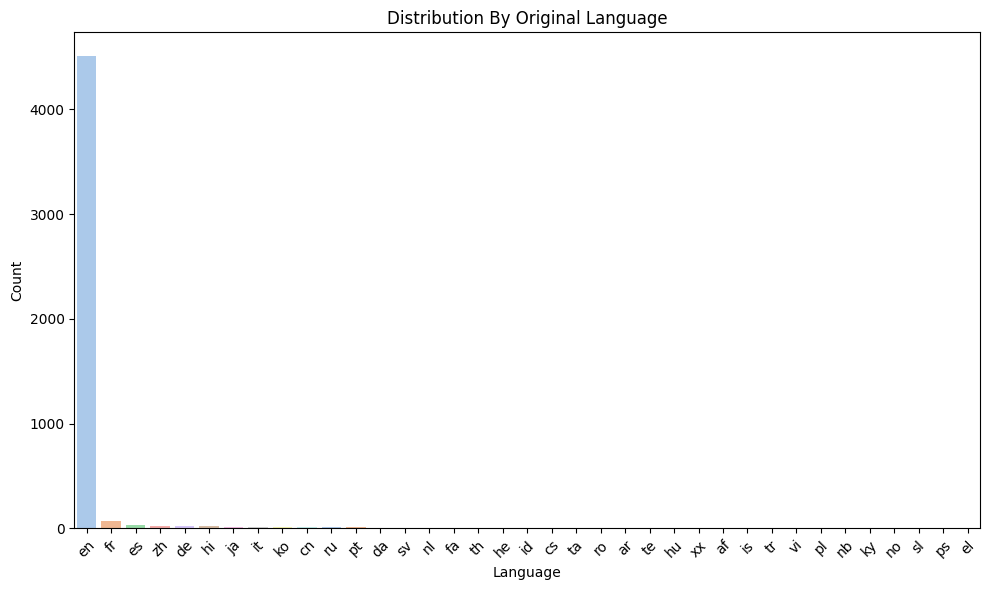

In [11]:
# languaes distribution

label = data['original_language'].nunique()
lang_counts = data['original_language'].value_counts()

lang_df = lang_counts.reset_index()
lang_df.columns = ['language', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='language', y='count', data=lang_df, palette='pastel')

plt.title('Distribution By Original Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

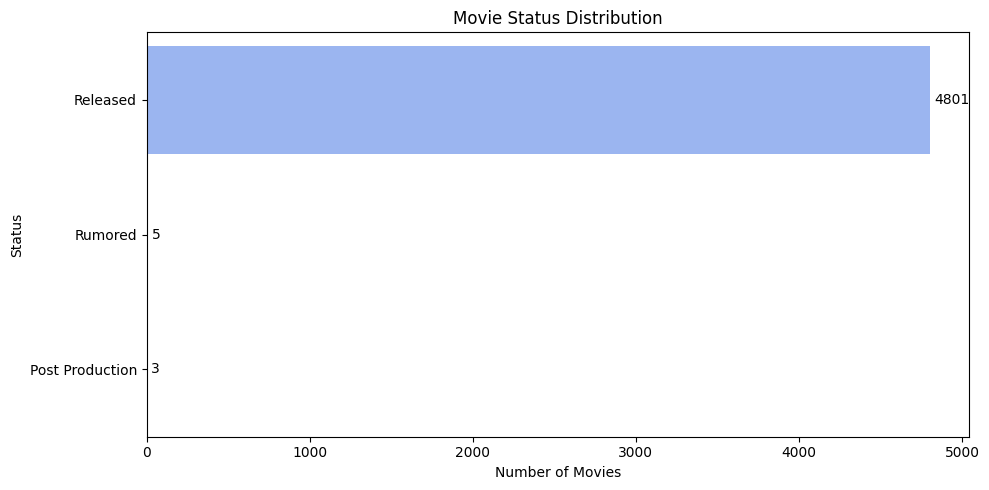

In [12]:
# distribution of status

labels = data['status'].nunique()
status_count = data['status'].value_counts()
status_df = status_count.reset_index()
status_df.columns =['status', 'count']


plt.figure(figsize=(10, 5))
ax = sns.barplot(data=status_df, x='count', y='status', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Movie Status Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Status')
plt.tight_layout()
plt.show()

In [13]:
null_release = data[data['release_date'].isna()]
null_release['movie_id']

4559    380097
Name: movie_id, dtype: int64

In [14]:
null_overview = data[data['overview'].isna()]
null_overview['movie_id']

2658    370980
4145    459488
4437    292539
Name: movie_id, dtype: int64

In [15]:
null_overview = data[data['runtime'].isna()]
print(null_overview['runtime'])

2658   NaN
4145   NaN
Name: runtime, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


The first dataset contains the following features:
<br>
- movie_id - A unique identifier for each movie.
- cast - The name of lead and supporting actors.
- crew - The name of Director, Editor, Composer, Writer etc.
<br>
<br>

The second dataset contrains the following features:
- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- id - This is infact the movie_id as in the first dataset.
- keywords - The keywords or tags related to the movie.
- original_language - The language in which the movie was made.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- Spoken_language - Language of the movie.
- runtime - The running time of the movie in minutes.
- status - Status of movie currently.
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_average - average ratings the movie recieved.
- vote_count - the count of votes recieved.
<br>
<br>

Both datasets will be combined to use all the features available. In total there will be 4809 rows of data with 23 columns. The amount of rows will be reduced after cleaning.

- There are several null values in tagline, release date, overview, runtime, and homepage
- there are numerical and non numerical datas
- Most ratings is at 7-8
- The most common language is english
- Most of the moviess ehre has been released
- total of 4809 rows of data available with 24 rows

Steps needed to do :
-  handle the null values, delete the rows containing those movie_id
-  filter the unused columns
-  remove id as movie_id exist

# Data Preparations

## Steps
- remove the id column as movie_id is just the same column
- change all null values in the tagline column into "No tagline"
- change all null values in the homepage column into "No homepage"
- drop all the null values from release date, overview, and runtime

Null values must be removed from the dataset so the model can efficiently learn.

For feature extraction, TF-IDF will be used.

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie into a new column, this is so the model can learn more from the data and make better recommendations. 

literal_eval is used to processes a DataFrame df by converting the string representations of Python data structures in the columns 'cast', 'crew', 'keywords', and 'genres' into actual Python objects (like lists or dictionaries). This step is common when loading data from sources like CSVs where complex objects are stored as strings.

The clean_data function standardizes text data by converting it to lowercase and removing spaces.

The create_soup function combines several text-based features from each row of the DataFrame df—specifically the 'keywords', 'cast', 'director', and 'genres' columns—into a single string, often called a "soup." It joins the lists of keywords, cast members, and genres into space-separated strings and appends the director's name. This combined string is then stored in a new column called 'final'. 

In [16]:
df = data.copy()
df = df.drop(['id'], axis=1)
df['tagline'] = df['tagline'].fillna('No tagline')
df['homepage'] = df['homepage'].fillna('No homepage')

df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4805 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   movie_id              4805 non-null   int64   
 1   title                 4805 non-null   object  
 2   cast                  4805 non-null   object  
 3   crew                  4805 non-null   object  
 4   budget                4805 non-null   int64   
 5   genres                4805 non-null   object  
 6   homepage              4805 non-null   object  
 7   keywords              4805 non-null   object  
 8   original_language     4805 non-null   object  
 9   original_title        4805 non-null   object  
 10  overview              4805 non-null   object  
 11  popularity            4805 non-null   float64 
 12  production_companies  4805 non-null   object  
 13  production_countries  4805 non-null   object  
 14  release_date          4805 non-null   object  
 15  revenue  

In [17]:
# get all num cats
num_cat = df.select_dtypes(include=['int64', 'float64']).columns
print(num_cat)

Index(['movie_id', 'budget', 'popularity', 'revenue', 'runtime',
       'vote_average', 'vote_count'],
      dtype='object')


In [18]:
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)
df

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,rating_category
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,7–8
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,6–7
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,6–7
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,7–8
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,6–7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",220000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No homepage,"[{'id': 5616, 'name': 'united states–mexico ba...",es,El Mariachi,...,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238,6–7
4805,72766,Newlyweds,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",9000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",No homepage,[],en,Newlyweds,...,[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5.9,5,5–6
4806,231617,"Signed, Sealed, Delivered","[{'cast_id': 8, 'character': 'Oliver O’Toole',...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.hallmarkchannel.com/signedsealeddel...,"[{'id': 248, 'name': 'date'}, {'id': 699, 'nam...",en,"Signed, Sealed, Delivered",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10

In [19]:
# director
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return 'no director'

# return top 3 lisstss
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
      
        if len(names) > 3:
            names = names[:3]
        return names
    return ''

In [20]:
df['director'] = df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)
df

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,rating_category,director
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,"[culture clash, future, space war]",en,Avatar,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,7–8,James Cameron
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,6–7,Gore Verbinski
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent]",en,Spectre,...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,6–7,Sam Mendes
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",250000000,"[Action, Crime, Drama]",http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist]",en,The Dark Knight Rises,...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,7–8,Christopher Nolan
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,"[based on novel, mars, medallion]",en,John Carter,...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,6–7,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",220000,"[Action, Crime, Thriller]",No homepage,"[united states–mexico barrier, legs, arms]",es,El Mariachi,...,1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238,6–7,Robert Rodriguez
4805,72766,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",9000,"[Comedy, Romance]",No homepage,[],en,Newlyweds,...,2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5.9,5,5–6,Edward Burns
4806,231617,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe]","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...",0,"[Comedy, Drama, Romance]",http://www.hallmarkchannel.com/signedsealeddel...,"[date, love at first sight, narration]",en,"Signed, Sealed, Delivered",...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,No tagline,7.0,6,6–7,Scott Smith
4807,126186,Shanghai Calling,"[Daniel Henney, Eliza Coupe, Bill Paxton]","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",0,[],http://shanghaicalling.com/,[],en,Shanghai Calling,...,2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,5.7,7,5–6,Daniel Hsia


In [21]:
df[['title', 'cast', 'director', 'keywords', 'genres']]

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
...,...,...,...,...,...
4804,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",Robert Rodriguez,"[united states–mexico barrier, legs, arms]","[Action, Crime, Thriller]"
4805,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein]",Edward Burns,[],"[Comedy, Romance]"
4806,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe]",Scott Smith,"[date, love at first sight, narration]","[Comedy, Drama, Romance]"
4807,Shanghai Calling,"[Daniel Henney, Eliza Coupe, Bill Paxton]",Daniel Hsia,[],[]


In [22]:
# cleaning it

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [23]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [24]:
# connect it into 1 place

def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df['final'] = df.apply(create_soup, axis=1)

print(len(df['final']))


4805


In [25]:
df

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,rating_category,director,final
0,19995,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,"[cultureclash, future, spacewar]",en,Avatar,...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,7–8,jamescameron,cultureclash future spacewar samworthington zo...
1,285,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,6–7,goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,206647,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,"[spy, basedonnovel, secretagent]",en,Spectre,...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,6–7,sammendes,spy basedonnovel secretagent danielcraig chris...
3,49026,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,7–8,christophernolan,dccomics crimefighter terrorist christianbale ...
4,49529,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,"[basedonnovel, mars, medallion]",en,John Carter,...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,6–7,andrewstanton,basedonnovel mars medallion taylorkitsch lynnc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,9367,El Mariachi,"[carlosgallardo, jaimedehoyos, petermarquardt]","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",220000,"[action, crime, thriller]",No homepage,"[unitedstates–mexicobarrier, legs, arms]",es,El Mariachi,...,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238,6–7,robertrodriguez,unitedstates–mexicobarrier legs arms carlosgal...
4805,72766,Newlyweds,"[edwardburns, kerrybishé, marshadietlein]","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",9000,"[comedy, romance]",No homepage,[],en,Newlyweds,...,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,5.9,5,5–6,edwardburns,edwardburns kerrybishé marshadietlein edwardb...
4806,231617,"Signed, Sealed, Delivered","[ericmabius, kristinbooth, crystallowe]","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...",0,"[comedy, drama, romance]",http://www.hallmarkchannel.com/signedsealeddel...,"[date, loveatfirstsight, narration]",en,"Signed, Sealed, Delivered",...,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,No tagline,7.0,6,6–7,scottsmith,date loveatfirstsight narration ericmabius kri...
4807,126186,Shanghai Calling,"[danielhenney, elizacoupe, billpaxton]","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",0,[],http://shanghaicalling.com/,[],en,Shanghai Calling,...,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,

In [26]:
# TF - IDF

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['final'])

print(tfidf_matrix.shape)

(4805, 11511)


# Modelling - Content Based Filtering

In [27]:
# cosine sim
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index, index=df['title'])

In [28]:
# function to run cosine sim

def cosine_sim(title,cosine_sim=cosine_sim_matrix):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [29]:
# testing with Avatar
cosine_sim('Avatar')

2405                     Aliens
206         Clash of the Titans
587                   The Abyss
43         Terminator Salvation
282                   True Lies
132         Wrath of the Titans
1450                   Sabotage
47      Star Trek Into Darkness
3442             The Terminator
3187            The Ice Pirates
Name: title, dtype: object

In [30]:
cosine_sim('JFK')

1530                     Criminal
884              Zero Dark Thirty
737     Jack Ryan: Shadow Recruit
188                          Salt
969                     Assassins
2143                         Milk
2505                 The Homesman
484                   The Postman
2010        In the Valley of Elah
2280           Dances with Wolves
Name: title, dtype: object

# Evaluation
For evaluation, Precision@K will be used. Precision@K is a common evaluation metric for recommender systems and information retrieval. It measures how many of the top-K recommended items are actually relevant to the user.

Equation : <br>
Precision@K = (Number of relevant items in top K recommendations) / K

In [61]:
# import groundtruth
df_gt = pd.read_csv('/kaggle/input/sadsaa/recommendation_groundtruth_clustered.csv')
df_gt

,user_id,movie_id
0,user_46,19995
1,user_31,285
2,user_18,206647
3,user_24,49026
4,user_33,49529
...,...,...
495,user_9,72545
496,user_3,109451
497,user_4,9533
498,user_43,2023


In [62]:
id_to_title = pd.Series(df.title.values, index=df.movie_id).to_dict()
title_to_id = pd.Series(df.movie_id.values, index=df.title).to_dict()

def recommend_movie_ids(title, k=10, cosine_sim=cosine_sim_matrix):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:k+1]
    movie_indices = [i[0] for i in sim_scores]
    return df['movie_id'].iloc[movie_indices].tolist()

def precision_at_k(groundtruth_df, k=10):
    user_groups = groundtruth_df.groupby('user_id')['movie_id'].apply(set).to_dict()
    precisions = []

    for user_id, relevant_movies in user_groups.items():
        seed_movie_id = next(iter(relevant_movies))
        seed_title = id_to_title.get(seed_movie_id, None)
        
        if seed_title is None or seed_title not in indices:
            continue
        recommended_ids = recommend_movie_ids(seed_title, k)
        hits = len(set(recommended_ids) & relevant_movies)
        precisions.append(hits / k)

    return sum(precisions) / len(precisions)

p_5 = precision_at_k(df_gt, k=5)
print(f"Precision@5: {p_5:.4f}")

Precision@5: 0.1760


Precision@K is calculated as the number of relevant items in the top-K recommendations divided by K. For example, if a recommendation system suggests 10 movies to a user and only 1 of them is actually something the user likes (as per the ground-truth), then the Precision@10 would be 0.1, or 10%.

In this context, the model achieved a Precision@5 score of 0.176, meaning that, on average, only 17% of the top-5 recommended items were relevant for the users. 